<br><br><h1 style="font-size:4em;color:#2467C0">Numpy: Image manipulations</h1>
<br>

In [1]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import random
from time import sleep
from IPython import display

<h1 style="font-size:2em;color:purple">Ingest data into numpy</h1>


In [2]:
stadium = misc.imread('./stadium.jpg')

type(stadium)

numpy.ndarray

In [3]:
stadium.shape

(2592, 4608, 3)

In [4]:
bird = misc.imread('./bird.jpg')

type(bird)

numpy.ndarray

In [5]:
X,Y,Z = bird.shape
X,Y,Z

(270, 340, 3)

<h1 style="font-size:2em;color:purple">Create a working copy of the background</h1>


In [6]:
working_copy = stadium.copy()

<h1 style="font-size:2em;color:purple">Get the boundaries of the background</h1>


In [7]:
x_max = working_copy.shape[0]-bird.shape[0]
y_max = working_copy.shape[1]-bird.shape[1]
x_max, y_max

(2322, 4268)

<h1 style="font-size:2em;color:purple">Randomly pick a point in the image</h1>


In [8]:
x0=random.randint(0,x_max)
y0=random.randint(0,y_max)
x0,y0

(1366, 370)

<h1 style="font-size:2em;color:purple">Filter out pixels that show the bird only</h1>


In [9]:
mask = bird[:, : ,:] < 220

<h1 style="font-size:2em;color:purple">Overlay bird on the stadium</h1>


In [10]:
working_copy[x0: x0+X, y0:y0+Y, :][mask] = bird[mask]

<h1 style="font-size:1.5em;color:blue">Can you spot the bird in the stadium ? </h1>


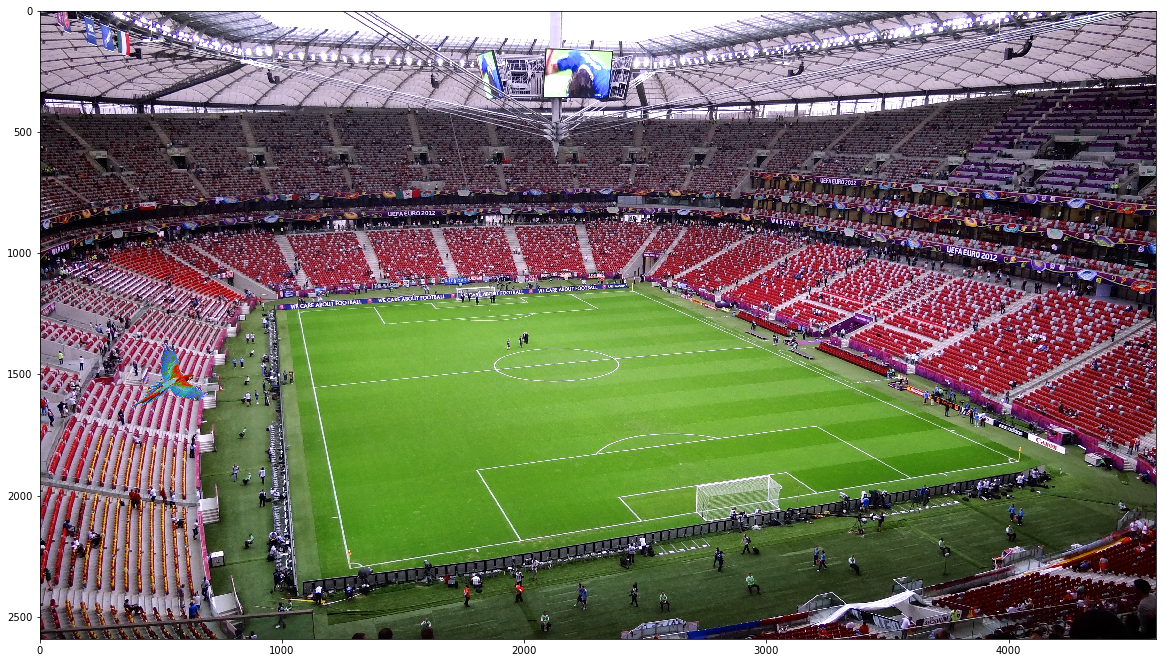

In [11]:
plt.figure(figsize=(20,15))
plt.imshow(working_copy)

<h1 style="font-size:2em;color:purple">Let us write a function to move the bird using numpy</h1>


In [14]:
def bird_flight_in_stadium():
    try:
        x0=random.randint(int(0.8*x_max),x_max)
        y0=1000
        working_copy = stadium.copy()

        steps = 0
        while(steps < 500):
            
            if(steps>0):
                working_copy[x0: x0+X, y0:y0+Y, :] = old
                
            x0=random.randint(x0-100,x0)
            y0=random.randint(y0,y0+100)
                
            while( x0+X > x_max or y0+Y>y_max or x0 <0 or y0 < 0 ):
                x0=random.randint(x0-100,x0)
                y0=random.randint(y0,y0+100)
                
            old = working_copy[x0: x0+X, y0:y0+Y, :].copy()
            working_copy[x0: x0+X, y0:y0+Y, :][mask] = bird[mask]    
            
            plt.close()
            fig,ax = plt.subplots(1,1,figsize=(15,15))
            plt.imshow(working_copy)
            plt.show()
            fig.canvas.draw()
            
            sleep(.005)
            display.clear_output(wait=True)
            
            steps += 1
    except KeyboardInterrupt:
        pass #Press square buttom to interrupt kernel anytime

<h1 style="font-size:2em;color:purple">Watch the bird fly around the stadium !</h1>


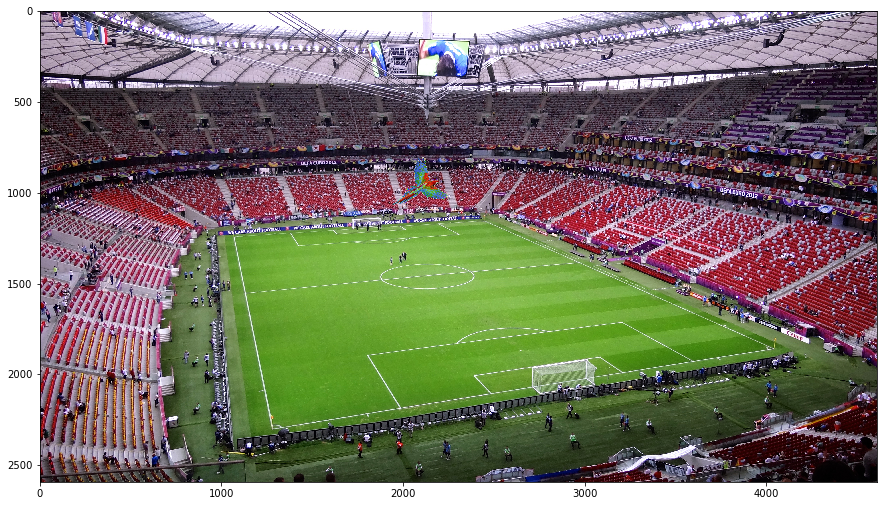

In [15]:
bird_flight_in_stadium()